# 외향적인 사람과 내향적인 사람 예측

In [277]:
import pandas as pd

In [278]:
person_test_df = pd.read_csv('test (1).csv')
person_train_df = pd.read_csv('train (1).csv')

In [279]:
person_train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,No,6.00,4.00,No,15.00,5.00,Extrovert
1,1,1.00,No,7.00,3.00,No,10.00,8.00,Extrovert
2,2,6.00,Yes,1.00,0.00,NaN,3.00,0.00,Introvert
3,3,3.00,No,7.00,3.00,No,11.00,5.00,Extrovert
4,4,1.00,No,4.00,4.00,No,13.00,NaN,Extrovert


### 컬럼명 설명
- Time_spent_Alone : 혼자 보내는 시간
- Stage_fear	: 무대 공포증
- Social_event_attendance : 사회적 이벤트 참여
- Going_outside	 : 밖에 나가는 정도
- Drained_after_socializing : 밖에 나간후 피로감을 느끼는 정도
- Friends_circle_size : 친구 관계 규모
- Post_frequency : 온라인에 글 업로드 빈도
- Personality : 외향적/내향적(정답 레이블)

In [280]:
person_train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.00,17334.00,17344.00,17058.00,17470.00,17260.00
mean,9261.50,3.14,5.27,4.04,8.00,4.98
std,5347.56,3.00,2.75,2.06,4.22,2.88
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,4630.75,1.00,3.00,3.00,5.00,3.00
50%,9261.50,2.00,5.00,4.00,8.00,5.00
75%,13892.25,4.00,8.00,6.00,12.00,7.00
max,18523.00,11.00,10.00,7.00,15.00,10.00


In [281]:
person_train_df.shape

(18524, 9)

### 데이터 전처리


In [282]:
person_train_df.isna().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [283]:
# 결측값 평균치로 채우기
fill_null = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
person_train_df[fill_null] = person_train_df[fill_null].fillna(person_train_df[fill_null].mean())

In [284]:
# 결측값 처리 확인
person_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,1893
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,1149
Friends_circle_size,0
Post_frequency,0
Personality,0


In [285]:
cat = ['Stage_fear','Drained_after_socializing']

In [286]:
cat_train_df = person_train_df.dropna()

In [287]:
cat_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [288]:
stage_fear_map = {
    'Yes' : 0,
    'No' : 1
}

In [289]:
drained_map = {
    'Yes' : 0,
    'No' : 1
}

In [290]:
# 범주형 데이터 매핑
from sklearn.feature_selection import f_classif

cat_train_df['Stage_fear'] = cat_train_df['Stage_fear'].map(stage_fear_map)
cat_train_df['Drained_after_socializing'] = cat_train_df['Drained_after_socializing'].map(drained_map)

In [291]:
cat_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [292]:
cat_train_df.dtypes

,0
id,int64
Time_spent_Alone,float64
Stage_fear,int64
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,int64
Friends_circle_size,float64
Post_frequency,float64
Personality,object


In [293]:
cat_train_df = cat_train_df.drop(columns='Personality')

In [294]:
per_train_df = person_train_df.drop(columns=['Personality','Drained_after_socializing','Stage_fear'])

In [295]:
per_train_df.dtypes

,0
id,int64
Time_spent_Alone,float64
Social_event_attendance,float64
Going_outside,float64
Friends_circle_size,float64
Post_frequency,float64


In [296]:
col = ['id','Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
per_train_df[col] = per_train_df[col].apply(pd.to_numeric,errors = 'coerce')
cat_train_df[col] = cat_train_df[col].apply(pd.to_numeric,errors = 'coerce')

In [297]:
per_train_df = person_train_df.drop(columns=['Personality','Drained_after_socializing','Stage_fear'])

In [298]:
per_train_df = pd.DataFrame(per_train_df)
cat_train_df = pd.DataFrame(cat_train_df)

In [299]:
per_train_df[fill_null].dropna().shape

(18524, 5)

### 범주형 컬럼 f-검정
- 가장 유사도가 높은 컬럼 채택

In [300]:
# Stage_fear 컬럼 f-검정
X = per_train_df[fill_null]
y = cat_train_df['Stage_fear']

common_idx = X.index.intersection(y.index)
X = X.loc[common_idx]
y = y.loc[common_idx]
f_vals,p_vals = f_classif(X,y)

pd.DataFrame({'feature' : fill_null, 'F_score' : f_vals, 'p_value': p_vals})

,feature,F_score,p_value
0,Time_spent_Alone,25588.85,0.00
1,Social_event_attendance,14029.29,0.00
2,Going_outside,14206.99,0.00
3,Friends_circle_size,11164.54,0.00
4,Post_frequency,11572.80,0.00


In [301]:
# Drained_after_socializing 컬럼 f-검정
X1 = per_train_df[fill_null]
y1 = cat_train_df['Drained_after_socializing']

common_idx1 = X1.index.intersection(y1.index)
X1 = X1.loc[common_idx1]
y1 = y1.loc[common_idx1]
f_vals1,p_vals1 = f_classif(X1,y1)

pd.DataFrame({'feature' : fill_null, 'F_score' : f_vals1, 'p_value': p_vals1})

,feature,F_score,p_value
0,Time_spent_Alone,25699.99,0.00
1,Social_event_attendance,14036.33,0.00
2,Going_outside,14297.11,0.00
3,Friends_circle_size,11129.65,0.00
4,Post_frequency,11637.99,0.00


In [302]:
cat_train_df['Stage_fear'].unique()

array([1, 0])

In [303]:
person_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,1893
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,1149
Friends_circle_size,0
Post_frequency,0
Personality,0


In [304]:
person_train_df['Stage_fear'] = person_train_df['Stage_fear'].map({
    'Yes' : 0,
    'No' : 1
})


In [305]:
person_train_df['Drained_after_socializing'] = person_train_df['Drained_after_socializing'].map({
    'Yes' : 0,
    'No' : 1
})

In [306]:
# 유사도가 높은 컬럼의 값에 따라 범주형 컬럼의 결측값 변경
threshhold = person_train_df['Time_spent_Alone'].mean()

person_train_df_filled = person_train_df.copy()

for idx in person_train_df.index:
    if pd.isna(person_train_df.loc[idx,'Stage_fear']):
        if person_train_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
            person_train_df.loc[idx, 'Stage_fear'] = 0
        else:
            person_train_df.loc[idx, 'Stage_fear'] = 1

    if pd.isna(person_train_df.loc[idx,'Drained_after_socializing']):
          if person_train_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
              person_train_df.loc[idx,'Drained_after_socializing'] = 0
          else:
            person_train_df.loc[idx, 'Drained_after_socializing'] = 1

In [307]:
person_train_df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,1.00,6.00,4.00,1.00,15.00,5.00,Extrovert
1,1,1.00,1.00,7.00,3.00,1.00,10.00,8.00,Extrovert
2,2,6.00,0.00,1.00,0.00,0.00,3.00,0.00,Introvert
3,3,3.00,1.00,7.00,3.00,1.00,11.00,5.00,Extrovert
4,4,1.00,1.00,4.00,4.00,1.00,13.00,4.98,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.00,1.00,7.00,3.00,1.00,9.00,7.00,Extrovert
18520,18520,1.00,1.00,6.00,7.00,1.00,6.00,5.00,Extrovert
18521,18521,7.00,0.00,1.00,1.00,0.00,1.00,4.98,Introvert
18522,18522,3.14,0.00,1.00,0.00,0.00,5.00,2.00,Introvert


In [308]:
person_train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,1.00,6.00,4.00,1.00,15.00,5.00,Extrovert
1,1,1.00,1.00,7.00,3.00,1.00,10.00,8.00,Extrovert
2,2,6.00,0.00,1.00,0.00,0.00,3.00,0.00,Introvert
3,3,3.00,1.00,7.00,3.00,1.00,11.00,5.00,Extrovert
4,4,1.00,1.00,4.00,4.00,1.00,13.00,4.98,Extrovert


In [309]:
person_train_df['Personality'] = person_train_df['Personality'].map({
    'Extrovert' : 0,
    'Introvert' : 1
})

In [310]:
X = person_train_df.drop(columns=['id','Personality'])
y = person_train_df['Personality']

In [311]:
X.shape, y.shape

((18524, 7), (18524,))

### 훈련 데이터, 테스트 데이터 분할

In [312]:
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.00,1.00,6.00,4.00,1.00,15.00,5.00
1,1.00,1.00,7.00,3.00,1.00,10.00,8.00
2,6.00,0.00,1.00,0.00,0.00,3.00,0.00
3,3.00,1.00,7.00,3.00,1.00,11.00,5.00
4,1.00,1.00,4.00,4.00,1.00,13.00,4.98
...,...,...,...,...,...,...,...
18519,3.00,1.00,7.00,3.00,1.00,9.00,7.00
18520,1.00,1.00,6.00,7.00,1.00,6.00,5.00
18521,7.00,0.00,1.00,1.00,0.00,1.00,4.98
18522,3.14,0.00,1.00,0.00,0.00,5.00,2.00


In [313]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)


In [314]:
!pip install lazypredict

### lazypredict 사용해 상위 2개 알고리즘 선정

In [315]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0)
models, predictions = clf.fit(X_train, X_val, y_train, y_val)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.97               0.96     0.96      0.97   
LinearDiscriminantAnalysis         0.97               0.96     0.96      0.97   
AdaBoostClassifier                 0.97               0.96     0.96      0.97   
RidgeClassifierCV                  0.97               0.96     0.96      0.97   
LinearSVC                          0.97               0.96     0.96      0.97   
SGDClassifier                      0.97               0.96     0.96      0.97   
RidgeClassifier                    0.97               0.96     0.96      0.97   
LogisticRegression                 0.97               0.96     0.96      0.97   
BernoulliNB                        0.97               0.96     0.96      0.97   
CalibratedClassifierCV             0.97               0.96     0.96      0.97   
SVC                         

In [316]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.00,1.00,6.00,4.00,1.00,15.00,5.00
1,1.00,1.00,7.00,3.00,1.00,10.00,8.00
2,6.00,0.00,1.00,0.00,0.00,3.00,0.00
3,3.00,1.00,7.00,3.00,1.00,11.00,5.00
4,1.00,1.00,4.00,4.00,1.00,13.00,4.98


In [317]:
X_train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
5081,11.00,0.00,3.00,1.00,0.00,8.00,0.00
4851,0.00,1.00,7.00,6.00,1.00,15.00,10.00
18254,2.00,1.00,7.00,6.00,1.00,12.00,10.00
6007,7.00,0.00,3.00,0.00,0.00,2.00,0.00
3472,2.00,1.00,4.00,7.00,1.00,15.00,5.00
...,...,...,...,...,...,...,...
16471,0.00,1.00,4.00,5.00,1.00,9.00,4.98
15011,2.00,1.00,7.00,4.00,1.00,7.00,8.00
18444,0.00,1.00,3.00,3.00,1.00,6.00,9.00
73,1.00,1.00,7.00,5.00,1.00,12.00,4.00


In [318]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

model = Perceptron(max_iter=1000, eta0=1.0,random_state=2020158011)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"cross_validated accuracy : {scores}")

cross_validated accuracy : [0.96322537 0.96018893 0.95006748 0.94095816 0.97232535]


accuracy : 0.9689608636977058
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2762
           1       0.94      0.94      0.94       943

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



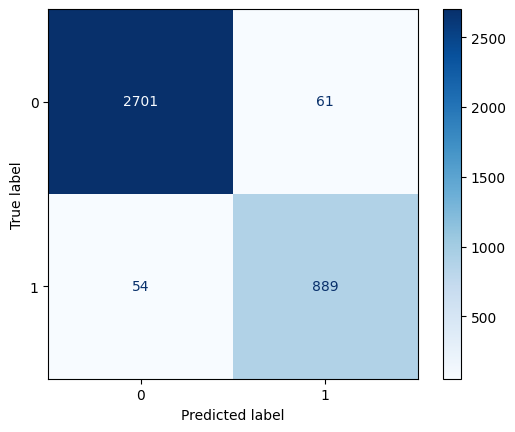

In [319]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lgb = LGBMClassifier(random_state=2020158011)
model.fit(X_train,y_train)
preds = model.predict(X_val)

print(f"accuracy : {accuracy_score(y_val,preds)}")
print(classification_report(y_val,preds))

cm = confusion_matrix(y_val, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [320]:
!pip install optuna

### LGBM 알고리즘 optuna 사용해 하이퍼 파라미터 조정

In [321]:
import optuna
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
# Optuna 목적 함수 정의
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'num_leaves': trial.suggest_int('num_leaves', 15, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 2020158011
    }
    model = LGBMClassifier(**params,verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    loss = log_loss(y_val,preds)
    return loss
    #return f1_score(y_val,preds)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Best trial:', study.best_params)

[I 2025-07-16 05:14:24,216] A new study created in memory with name: no-name-52547112-8986-4f0e-9831-27eee252a2d4
[I 2025-07-16 05:14:24,853] Trial 0 finished with value: 1.0895787259328262 and parameters: {'n_estimators': 146, 'learning_rate': 0.148928371476741, 'max_depth': 13, 'num_leaves': 42, 'min_child_samples': 25, 'subsample': 0.751417768955015, 'colsample_bytree': 0.9929135070518293, 'reg_alpha': 0.7581278936581823, 'reg_lambda': 0.28487992342560575}. Best is trial 0 with value: 1.0895787259328262.
[I 2025-07-16 05:14:25,115] Trial 1 finished with value: 1.0117516740804815 and parameters: {'n_estimators': 69, 'learning_rate': 0.09697106699621638, 'max_depth': 9, 'num_leaves': 86, 'min_child_samples': 46, 'subsample': 0.5705654278745229, 'colsample_bytree': 0.921743649109289, 'reg_alpha': 0.8378911360992257, 'reg_lambda': 0.7117862769513893}. Best is trial 1 with value: 1.0117516740804815.
[I 2025-07-16 05:14:25,768] Trial 2 finished with value: 1.060393581488197 and parameters

Best trial: {'n_estimators': 69, 'learning_rate': 0.09697106699621638, 'max_depth': 9, 'num_leaves': 86, 'min_child_samples': 46, 'subsample': 0.5705654278745229, 'colsample_bytree': 0.921743649109289, 'reg_alpha': 0.8378911360992257, 'reg_lambda': 0.7117862769513893}


Best trial: {'n_estimators': 147, 'learning_rate': 0.22790308217928787, 'max_depth': 3, 'num_leaves': 46, 'min_child_samples': 72, 'subsample': 0.9546063780884504, 'colsample_bytree': 0.7352959423814639, 'reg_alpha': 0.03923110923582118, 'reg_lambda': 0.6929538798742644}

In [322]:
# 가장 성능이 좋았던 하이퍼 파라미터 채택
best_params = study.best_params
print(best_params)

{'n_estimators': 69, 'learning_rate': 0.09697106699621638, 'max_depth': 9, 'num_leaves': 86, 'min_child_samples': 46, 'subsample': 0.5705654278745229, 'colsample_bytree': 0.921743649109289, 'reg_alpha': 0.8378911360992257, 'reg_lambda': 0.7117862769513893}


In [323]:
best_model = LGBMClassifier(**best_params)
best_model.fit(X,y)

LGBMClassifier(colsample_bytree=0.921743649109289,
               learning_rate=0.09697106699621638, max_depth=9,
               min_child_samples=46, n_estimators=69, num_leaves=86,
               reg_alpha=0.8378911360992257, reg_lambda=0.7117862769513893,
               subsample=0.5705654278745229)

### 테스트 데이터 전처리

In [324]:
test_df = pd.read_csv('test (1).csv')
test_df.isna().sum()

,0
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [325]:
test_df[fill_null] = test_df[fill_null].fillna(test_df[fill_null].mean())

In [326]:
threshhold = test_df['Time_spent_Alone'].mean()

test_df_filled = test_df.copy()

for idx in test_df.index:
    if pd.isna(test_df.loc[idx,'Stage_fear']):
        if test_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
            test_df.loc[idx, 'Stage_fear'] = 1
        else:
            test_df.loc[idx, 'Stage_fear'] = 0

    if pd.isna(test_df.loc[idx,'Drained_after_socializing']):
          if test_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
              test_df.loc[idx,'Drained_after_socializing'] = 1
          else:
            test_df.loc[idx, 'Drained_after_socializing'] = 0

In [327]:
test_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0


In [328]:
test_df.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [329]:
test_df['Stage_fear'] = test_df['Stage_fear'].map(stage_fear_map)
test_df['Drained_after_socializing'] = test_df['Drained_after_socializing'].map(drained_map)

### 예측 수행 후 저장

In [330]:
features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency']
X_test = test_df[features]
y_test_pred = best_model.predict(X_test)

submission = pd.DataFrame({
    'id' : test_df['id'],
    'Personality' : y_test_pred
})
submission.to_csv('person_submission1.csv', index=False)

In [331]:
sub_df = pd.read_csv('person_submission1.csv') # 'Extrovert' : 0,
    #'Introvert' : 1

In [332]:
sub_df['Personality'] = sub_df['Personality'].map({
    0 : 'Extrovert',
    1 : 'Introvert'
})

In [333]:
sub_df.to_csv('person1.csv',index=False)

In [334]:
import pandas as pd
result_df = pd.read_csv('person1.csv',index_col=0)

In [335]:
result_df

,Personality
id,
18524,Extrovert
18525,Introvert
18526,Extrovert
18527,Extrovert
18528,Introvert
...,...
24694,Extrovert
24695,Introvert
24696,Extrovert


## AutoML H20.AI 써보기


In [336]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [337]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,2 hours 43 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_o59dn5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.991 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [339]:
person_train_df['Personality'] = person_train_df['Personality'].map({
    0 : 'Extrovert',
    1 : 'Introvert'
})

In [340]:
from h2o.frame import H2OFrame
h2o_df = H2OFrame(person_train_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [341]:
h2o_df.head()

id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,1,6,4,1,15,5,Extrovert
1,1,1,7,3,1,10,8,Extrovert
2,6,0,1,0,0,3,0,Introvert
3,3,1,7,3,1,11,5,Extrovert
4,1,1,4,4,1,13,4.9821,Extrovert
5,2,1,8,5,1,7.99674,3,Extrovert
6,1,1,8,4.04432,1,7.99674,4,Extrovert
7,2,1,8,3,1,4,5,Extrovert
8,4,0,2,1,0,0,2,Introvert
9,1,1,8,6,1,14,9,Extrovert


In [342]:
p_df = pd.read_csv('person1.csv')
p_df.shape

(6175, 2)

In [343]:
train,test = h2o_df.split_frame(ratios=[0.8], seed=42)

In [344]:
from h2o.automl import H2OAutoML

target = 'Personality'
ignore = ['id',target]
features = [col for col in h2o_df.columns if col not in ignore]

In [345]:
aml = H2OAutoML(max_models=15, max_runtime_secs=300,seed=42)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_5_20250716_51530_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    48                 48                          30334                  6            6            6             32            57            45.6458

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.025214391516592372
RMSE: 0.15879040121050256
LogLoss: 0.11252575145967797
Mean Per-Class Error: 0.03685082318297417
AUC: 0.9808130647304409
AUCPR: 0.9619341120467156
Gini: 0.9616261294608819

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4856163549960447
           Extrovert    Introvert    Error    Rate
---------  -----------  -----------  -------  ---------------
Extrovert  10858        178          0.0161   (178.0/11036.0)
Introvert  222          3634         0.0576   (222.0/3856.0)
Total      11080        3812         0.0269   (400.0/14892.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.485616     0.947835  191
max f2                       0.238285     0.946107  218
max f0point5                 0.829805     0.951952  150
max accuracy                 0.509372     0.97314   190
max precision                0.985928     1         0
max recall                   0.0116574    1         392
max specificity              0.985928     1         0
max absolute_mcc             0.485616     0.929777  191
max min_per_class_accuracy   0.046779     0.95332   282
max mean_per_class_accuracy  0.253225     0.963657  216
max tns                      0.985928     11036     0
max fns                      0.985928     3855      0
max fps                      0.0076966    11036     399
max tps                      0.0116574    3856      392
max tnr                      0.985928     1         0
max fnr                      0.985928     0.999741  0
max fpr                      0.0076966    1         399
max tpr                      0.0116574    1         392

Gains/Lift Table: Avg response rate: 25.89 %, avg score: 25.90 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100054                   0.969995           3.83611    3.83611            0.993289         0.973477   0.993289                    0.973477            0.0383817       0.0383817                  283.611   283.611            0.0382911
2        0.0200107                   0.966663           3.86203    3.84907            1                0.968464   0.996644                    0.97097             0.0386411       0.0770228                  286.203   284.907            0.0769322
3        0.0300161                   0.964438           3.78427    3.82747            0.979866         0.965541   0.991051                    0.969161            0.0378631       0.114886                   278.427   282.747            0.114523
4        0.0400215                   0.962719           3.81019    3.82315            0.986577         0.963599   0.989933                    0.96777             0.0381224       0.153008                   281.019   282.315            0.152465
5        0.0500269               

In [346]:
X_test2 = X_test.copy()

In [347]:
X_test2['id'] = test_df['id']

In [348]:
import pandas as pd
from h2o.frame import H2OFrame

# X_test는 판다스 DataFrame, id 컬럼 포함되어있다고 가정
X_test_h2o = H2OFrame(X_test2)

# 예측
preds = aml.leader.predict(X_test_h2o)
preds_df = preds.as_data_frame()

# id와 예측 결과 합치기
result_df = pd.DataFrame({
    'id': X_test2['id'],
    'Personality': preds_df['predict']
})

print(result_df.head())


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
      id Personality
0  18524   Extrovert
1  18525   Introvert
2  18526   Extrovert
3  18527   Extrovert
4  18528   Introvert


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [349]:
result_df

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [350]:
result_df.to_csv('person4.csv',index=False)